In [6]:
import pandas as pd 
import numpy as np 
import scanpy as sc
import matplotlib.pyplot as plt
import os
import shutil
import anndata
import gc
from adjustText import adjust_text
import seaborn as sns
sc._settings.settings._vector_friendly=True
sc.settings.n_jobs = 60
print("Current working directory:", os.getcwd())

Current working directory: /home/jupyter/BRI_Figures_Final_V2/Figure4


In [2]:
def split_umap(adata, split_by, ncol=2, nrow=None, **kwargs):
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    axs = axs.flatten()
    for i, cat in enumerate(categories):
        ax = axs[i]
        sc.pl.umap(adata[adata.obs[split_by] == cat], ax=ax, show=False, title=cat, **kwargs)
    plt.tight_layout()

In [3]:
adata=sc.read_h5ad('06_UMAP/BRI_Y1D0.h5ad')

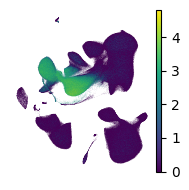

In [7]:
with plt.rc_context({"figure.figsize": (2, 2),  "figure.frameon": False}):
    ax=sc.pl.umap(adata, color=['GZMH'],title='', size=0.1,show=False,ncols=1 ,
                  use_raw=False,frameon=False)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig('GZMH.pdf', dpi=300, bbox_inches='tight')

In [45]:
barcodes=adata.obs[adata.obs['AIFI_L3'].str.contains('T cell')|adata.obs['AIFI_L3'].str.contains('NK') ]["barcodes"]

In [36]:
adata_sub=adata[barcodes]

In [47]:
barcodes=adata_sub.obs[~adata_sub.obs['AIFI_L3'].str.contains('ISG')]["barcodes"]

In [48]:
adata_sub=adata_sub[barcodes]

In [49]:
barcodes=adata_sub.obs[~adata_sub.obs['AIFI_L3'].str.contains("Pro")]["barcodes"]

In [50]:
adata_sub=adata_sub[barcodes]

In [62]:
adata_sub.obs["AIFI_L3"]=adata_sub.obs["AIFI_L3"].str.replace(" cell", '', regex=False)

/tmp/ipykernel_8890/3926866544.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs["AIFI_L3"]=adata_sub.obs["AIFI_L3"].str.replace(" cell", '', regex=False)


In [65]:
sc.set_figure_params(scanpy=True, fontsize=6)
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
dp = sc.pl.dotplot(adata_sub, 
                   ['GZMH'],cmap='viridis',
                   figsize=(2,80/25.4),
                   groupby='AIFI_L3', dot_max=1,dot_min=0.001,
                   dendrogram=False,
                   return_fig=True)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


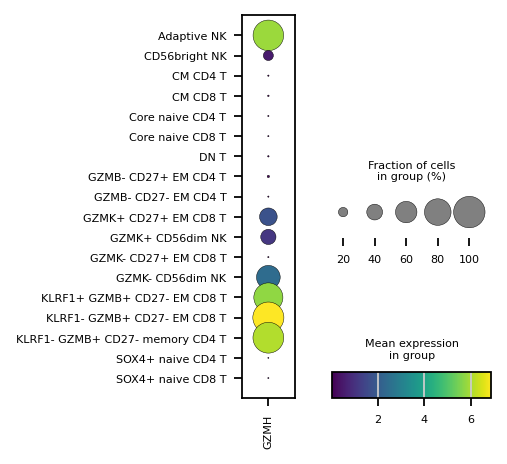

In [66]:
dp.savefig('GZMH_dots_plot.pdf', dpi=300, format='pdf', bbox_inches='tight')